In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Prepares the values for calculation
h = 1
m = 1
L = 1

#Creates a range of x values from -L/2 to L/2
Real_Space_Grid = np.linspace(-L/2, L/2, 2000)

#I spent half an hour trying to come up with some clever way to do this, but it just so happens numpy just has a built in function that does it for you
#This function calculates all the delta X values 
DeltaX_All = np.diff(Real_Space_Grid)

#All the delta X values should be the same, but I'll average them just to be safe
DeltaX = np.mean(DeltaX_All)

#Testing
print(DeltaX)

0.0005002501250625312


In [4]:
#Constructs the Off Diagonal Matrix by preparing a 1999 long array of ones and imposing them on the super and sub diagonal
Ones = np.full(1999, 1)
Sup_Diag_Matrix = np.diagflat(Ones, k=1)
Sub_Diag_Matrix = np.diagflat(Ones, k=-1)

#Combines Off Diagonal Matrix with the Identity matrix times negitive 2 to create the Laplacian Matrix
LP_Matrix = Sup_Diag_Matrix + (np.identity(2000) * -2) + Sub_Diag_Matrix



#This will take the matrix times the one over the distance between points squared as requested
Laplacian = (1/(DeltaX**2)) * LP_Matrix


#Tests to see if LP matrix was constructed correctly
print(Laplacian)

[[-7992002.  3996001.        0. ...        0.        0.        0.]
 [ 3996001. -7992002.  3996001. ...        0.        0.        0.]
 [       0.  3996001. -7992002. ...        0.        0.        0.]
 ...
 [       0.        0.        0. ... -7992002.  3996001.        0.]
 [       0.        0.        0. ...  3996001. -7992002.  3996001.]
 [       0.        0.        0. ...        0.  3996001. -7992002.]]


In [5]:
#This is the construction of the hamiltonian
Hamiltionian = -h**2/(2*m) * Laplacian

#And a test to see if it works
print(Hamiltionian)

[[ 3996001.  -1998000.5       -0.  ...       -0.        -0.        -0. ]
 [-1998000.5  3996001.  -1998000.5 ...       -0.        -0.        -0. ]
 [      -0.  -1998000.5  3996001.  ...       -0.        -0.        -0. ]
 ...
 [      -0.        -0.        -0.  ...  3996001.  -1998000.5       -0. ]
 [      -0.        -0.        -0.  ... -1998000.5  3996001.  -1998000.5]
 [      -0.        -0.        -0.  ...       -0.  -1998000.5  3996001. ]]


In [6]:
#Calculates the Eigenvalues and eigenvector
Eigvals, Eigvec = np.linalg.eig(Hamiltionian)



#Sorts Eigenvalues
Sorted_Eig = np.sort(Eigvals)

#Creates an array and places the first 7 Eigen values into it
Extracted_Eig = []
for i in range(6):
    Extracted_Eig.append(Sorted_Eig[i])

#Print for testing
print(Extracted_Eig)




[np.float64(4.924941448837263), np.float64(19.699753647755948), np.float64(44.32440018504675), np.float64(78.79882035589716), np.float64(123.1229291864409), np.float64(177.29661742153422)]


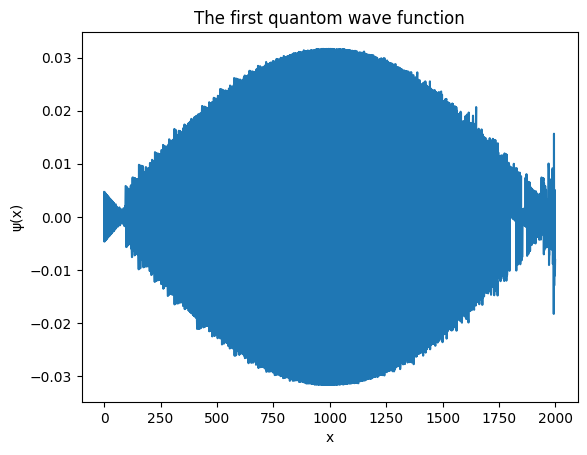

In [ ]:

#plots the first wave function and energy level
a = np.array(Eigvec[0])
plt.plot(a,Real_Space_Grid)
plt.xlabel('x')
plt.ylabel('\u03C8(x)')
plt.title('The first quantom wave function')
plt.show()